# Introduction
This notebook aims to analyze dataset of video games with sales greater than 100,000 copies across 4 different regions (North America, Europe, Japan, and other regions) as well as the global sales.

# Sturcture 
* Importing Libraries
* Loading the data
* Exploring data
    * Observations
    * Actions
    * Visual Exploration
* Data Analysis
    * Calculate sales for each genre
    * Calculating highest sales for each publisher over the course of the years
    * Calculating each region percentage of global genre sales

# Importing libraries

In [1]:
# Statistical analysis libraries
import numpy as np 
import pandas as pd 

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Loading data

In [2]:
# Identifying file path
file_path = 'vgsales.csv'
# Importing data into DataFrame
vgsales_data = pd.read_csv(file_path, index_col=0)

# Exploring data

In [3]:
vgsales_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vgsales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [5]:
vgsales_data.shape

(16598, 10)

In [6]:
# Counting the number of rows where there are null values in year column
vgsales_data['Name'].loc[vgsales_data.Year.isnull()].count()

271

In [7]:
# Counting the number of rows where there are null values in publisher column
vgsales_data['Name'].loc[vgsales_data.Publisher.isnull()].count()

58

### Observations
* Through reviewing the columns, the following are the columns that have null values 'year, publisher'.
* Year type is float.

### Actions
* Due to the low number of null values within the two columns of Year (271) and Publisher (58), We decided to drop the rows that include null values.
* Change Year type to object.

In [8]:
# Dropping rows of Null values in the entire dataset
vgsales_data.dropna(inplace=True)

In [9]:
# Changing Year type from float to object
vgsales_data['Year'] = vgsales_data['Year'].astype(str)
vgsales_data['Year'] = vgsales_data['Year'].str.split('.').str[0]
vgsales_data = vgsales_data.sort_values('Year', ascending=False)

### Visual Exploration

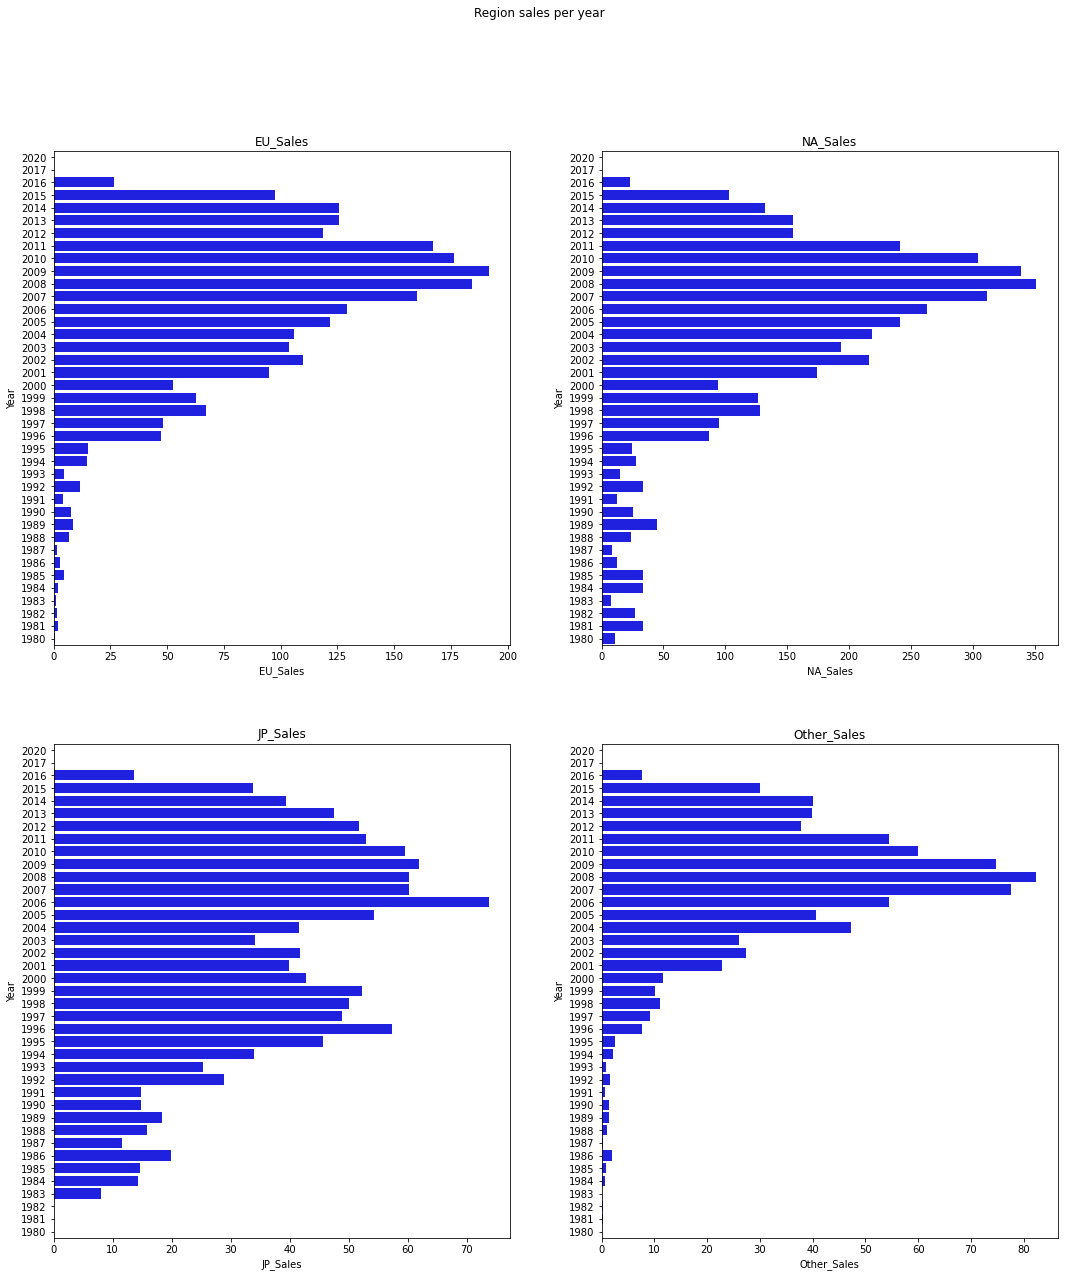

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,20))
fig.suptitle('Region sales per year');
sns.barplot(y= vgsales_data['Year'], x=vgsales_data['EU_Sales'], estimator=sum, ci=None, ax=axes[0,0], color='Blue').set_title('EU_Sales');
sns.barplot(y= vgsales_data['Year'], x=vgsales_data['NA_Sales'], estimator=sum, ci=None, ax=axes[0,1], color='Blue').set_title('NA_Sales');
sns.barplot(y= vgsales_data['Year'], x=vgsales_data['JP_Sales'], estimator=sum, ci=None, ax=axes[1,0], color='Blue').set_title('JP_Sales');
sns.barplot(y= vgsales_data['Year'], x=vgsales_data['Other_Sales'], estimator=sum, ci=None, ax=axes[1,1], color='Blue').set_title('Other_Sales');

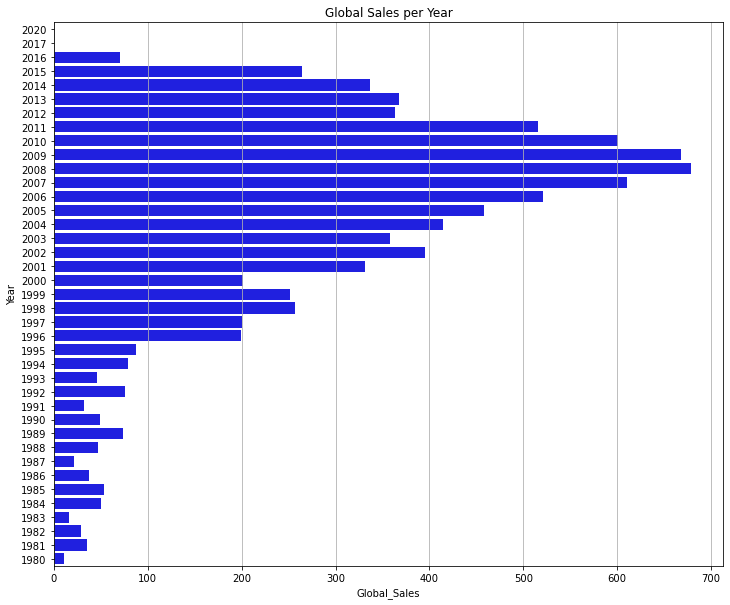

In [11]:
# reviewing the Global Sales per each year
plt.figure(figsize=(12,10))
plt.grid()
sns.barplot(y= vgsales_data['Year'], x=vgsales_data['Global_Sales'], estimator=sum, ci=None, color='Blue').set_title('Global Sales per Year');

# Data Analysis

### Calculate sales for each genre

In [12]:
# Counting the number of unique genres
vgsales_data.Genre.nunique()

12

In [13]:
Genre_NA = vgsales_data.groupby('Genre').NA_Sales.sum().sort_values(ascending=True)
Genre_EU = vgsales_data.groupby('Genre').EU_Sales.sum().sort_values(ascending=True)
Genre_JP = vgsales_data.groupby('Genre').JP_Sales.sum().sort_values(ascending=True)
Genre_other = vgsales_data.groupby('Genre').Other_Sales.sum().sort_values(ascending=True)

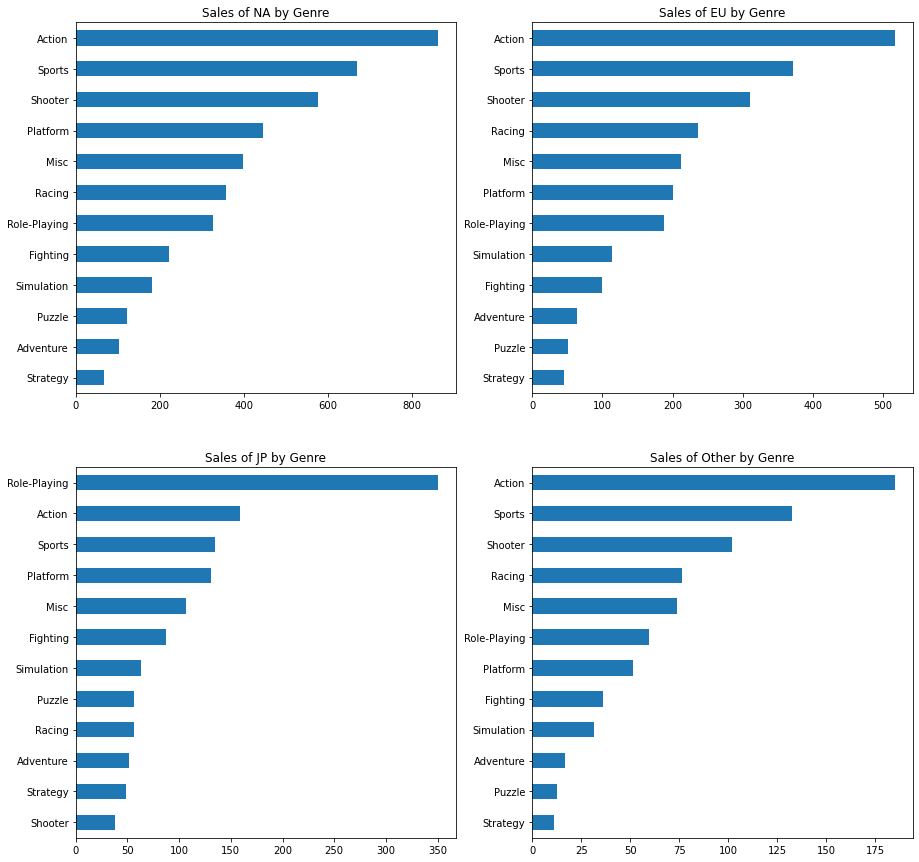

In [14]:
# plotting sales of different region versus each Genre
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
Genre_NA.plot(kind='barh',ax=axes[0,0],xlabel='',title="Sales of NA by Genre");
Genre_EU.plot(kind='barh',ax=axes[0,1],xlabel='',title="Sales of EU by Genre");
Genre_JP.plot(kind='barh',ax=axes[1,0],xlabel='',title="Sales of JP by Genre");
Genre_other.plot(kind='barh',ax=axes[1,1],xlabel='',title="Sales of Other by Genre");

### Insight
* Although the genre responsible for the highest sales in all regions is Action, Japan's highest sales genre is Role-Playing.

### Calculating highest sales for each publisher over the course of the years

In [15]:
vgsales_data.Platform.nunique()

31

In [16]:
vgsales_data.Publisher.nunique()

576

In [17]:
# subdataframe for year,publisher & global_sales
publisher_df = vgsales_data[['Year','Publisher','Global_Sales']]

# grouping the subdataframe based on year and publisher to obtain global sales total values for each publisher per year
df_1 = publisher_df.groupby(['Year','Publisher'],as_index=False)['Global_Sales'].sum()
df_1

,Year,Publisher,Global_Sales
0,1980,Activision,3.02
1,1980,Atari,8.36
2,1981,20th Century Fox Video Games,1.35
3,1981,Activision,8.50
4,1981,Atari,8.45
...,...,...,...
2316,2016,Yeti,0.02
2317,2016,dramatic create,0.03
2318,2017,Idea Factory,0.01
2319,2017,Sega,0.04


In [ ]:
fig = px.scatter(df_1,x='Year',y='Global_Sales',title='Publisher Global Sales over Years',color='Publisher',width=1100, height=500)
fig.show()

### Insight
The previous plot show that "Nintendo" has the highest five global total sales and the values are as follows:
* in year 2006 global sales reached 205.61 million
* in year 2009 global sales reached 128.89 million
* in year 2005 global sales reached 127.47 million
* in year 2007 global sales reached 104.18 million
* in year 2008 global sales reached 91.22 million

### Calculating each region percentage of global genre sales

In [ ]:
Percent_df = vgsales_data.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()
Percent_df

In [ ]:
# plotting a pie chart for each genre showing the percentage of each region sales from the global sales
fig, axs = plt.subplots(4,3,figsize=(20,20))
fig.suptitle('contribution of regions from global sales in each Genre');
percent_genre = {}
for i,row in Percent_df.iterrows():
    x = [row.NA_Sales/row.Global_Sales,
        row.EU_Sales/row.Global_Sales,
        row.JP_Sales/row.Global_Sales,
        row.Other_Sales/row.Global_Sales]
    percent_genre.update({i:x})
mylabels = ["NA_sales", "EU_sales", "JP_sales", "Other_sales"]
for x,ax in zip(percent_genre.items(), axs.flatten()):
    ax.pie(x=x[1],labels=mylabels,autopct='%1.1f%%',)
    ax.set_title(x[0])


### Insight
* the previous pie charts show that in the whole genres of video games sales, NA contributes with the highest percentage over the entire period, and the second highest sales varies between EU & JP